In [2]:
import seaborn as sns

import scipy.stats as scs
import matplotlib.pyplot as plt
from ipywidgets import interact
import numpy as np


import warnings
warnings.filterwarnings("ignore")

## Normal Dagilim

Kullanim alanlari:
- Hemen hemen her yerde

### Normal dağılım nedir?
- Gauss dağılımı veya Gauss tipi dağılım olarak da isimlendirilir. 
- En popüler random değişken tipidir. Doğal yaşamdan örneklemeler için kullanılır.
- Merkezi limit teorem zaten bundan esinlenilmiştir. (Aynı dağılıma sahip yeteri kadar örneklemden alınan rastgele değerler, normal dağılıma uyar.)
-  Simetrik çan eğrisi oluşturur. Ortalama değer ve standart sapma değeri alır. 
- Verinin %68i 1 standart sapma içinde kalır. Verinin %95i ortalamanın 2 standart sapma içine düşer, Verinin %99u, ortalamanın 3 standart sapma içine düşer. 


In [3]:
np.random.normal(loc=150, scale=5, size=10)

array([144.99453952, 160.69943533, 150.05324321, 150.90897392,
       157.53737181, 157.42411555, 151.67750052, 156.2581517 ,
       147.88067894, 147.25584204])

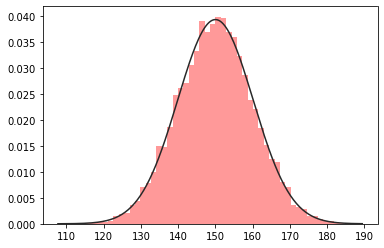

In [4]:
import seaborn as sns
import scipy
g = scs.distributions.norm(150,10)
h=np.random.normal(loc=150, scale=10, size= 10000) ;
sns.distplot(h,fit=scs.norm, kde=False, hist=True, color='r');

In [5]:
g.sf(160)  # olasılık dağılımlarından girilen değer ve büyüğü olma ihtimali

0.15865525393145707

In [6]:
(h >= 150).mean()  # görüldüğü gibi normal dağılım örneklemim, toarik değere yakın

0.5022

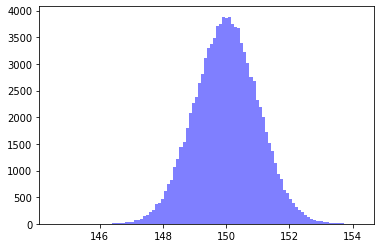

In [7]:
N = 100000
# x = np.random.randn(N)
x = scs.norm.rvs(150,size=N)
num_bins = 100
plt.hist(x, bins=num_bins, facecolor='blue', alpha=0.5);

## İnteraktif çizim ile ortalama ve varyans etkilerini görelim

In [15]:
@interact(mu = [120,130,140,150,160,170,180])
def normal(mu=130, var=10):
    x = np.linspace(0,300,10000)

    nor1 = scs.distributions.norm(mu, var).pdf(x)
    nor2 = scs.distributions.norm(150, 10).pdf(x)

    plt.plot(x, nor1, label = f"$\ mu = {mu}, \sigma =  {var}$")
    plt.plot(x,nor2, label = f"$\ mu = 150, \sigma = 30$")
    plt.legend()

    plt.xlim(0,300)
    plt.ylim(0,0.05)

interactive(children=(Dropdown(description='mu', index=1, options=(120, 130, 140, 150, 160, 170, 180), value=1…

In [9]:
import scipy.stats as scs
import matplotlib.pyplot as plt
from ipywidgets import interact
import numpy as np

@interact(mu=(-1.0,1.0,0.1), sigma=(0.2, 2.0, 0.1))
def normal_dagilim(mu=0.0, sigma=1.0):
    x = np.linspace(-5, 5., 1000)
#     lamda = 1.0
    expon = scs.distributions.norm(mu, sigma).pdf(x)
    expon1 = scs.distributions.norm(0., 1.).pdf(x)
    plt.plot(x, expon, label=f'$\mu={mu}, \sigma= {sigma}$')
    plt.plot(x, expon1, label='$\mu=0.0, \sigma=1.0$')
    plt.legend()
    
    plt.xlim(-5, 5.)
    plt.ylim(-0.1, 2.)

interactive(children=(FloatSlider(value=0.0, description='mu', max=1.0, min=-1.0), FloatSlider(value=1.0, desc…

In [10]:
# Burada Central Limit Teorem konusunu öğrenelim. 
# merkezi limit teoremi
# bu teoreme gore, rassal olarak seçilen bir topluluğu ait ortalamalar, normal dağılıma uygun bir grafik sergiler

## Türkiyedeki Erkeklerin Boy Ortalamaları

In [11]:
scs.norm(171, 6)

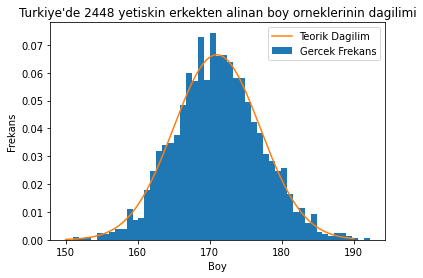

In [12]:
tr_boy = scs.norm(171, 6)
N = 2448
plt.hist(tr_boy.rvs(N), label='Gercek Frekans', density=True, bins=50)
plt.plot(np.linspace(150,190,500), tr_boy.pdf(np.linspace(150, 190, 500)), label="Teorik Dagilim")
plt.title(f"Turkiye'de {N} yetiskin erkekten alinan boy orneklerinin dagilimi")
plt.xlabel("Boy")
plt.legend()
plt.ylabel("Frekans");

## Meyve Ağırlıklarının Örneklenmesi

No handles with labels found to put in legend.


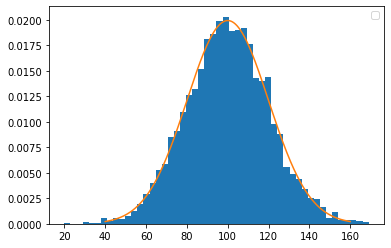

In [13]:
mandalina_ağırlığı = scs.norm(100,20)  # piyasada bulunan mandalinalara ait random değerler

plt.hist(mandalina_ağırlığı.rvs(5000),density=True, bins=50);
plt.plot(np.linspace(40,160,5000), mandalina_ağırlığı.pdf(np.linspace(40,160,5000)));
plt.legend()

- Rastgele seçilen bir mandalinanın 90 gr'dan fazla olma ihtimali nedir?

In [16]:
mandalina_ağırlığı.sf(90)  # survival function.(also defined as 1 - cdf, but sf is sometimes more accurate).


0.6914624612740131

In [29]:
mandalina_ağırlığı.cdf(90) # cumulative distribution function ( 1-sf() )  cdf(x, loc=0, scale=1)

0.3085375387259869

In [66]:
mandalina_ağırlığı.logcdf(90) # Log of the cumulative distribution function.

-1.1759117615936188

In [51]:
mandalina_ağırlığı.rvs()  # random variates  rvs(loc=0, scale=1, size=1, random_state=None)

69.9349770897126

In [59]:
mandalina_ağırlığı.isf(100) # Inverse survival function (inverse of sf).

nan

In [64]:
mandalina_ağırlığı.pdf(80)  # Probability density function.

0.012098536225957168

In [65]:
mandalina_ağırlığı.logpdf(80)  #Log of the probability density function.

-4.4146708067586635

In [72]:
mandalina_ağırlığı.stats()   # Mean(‘m’), variance(‘v’), skew(‘s’), and/or kurtosis(‘k’).

(array(100.), array(400.))

In [73]:
mandalina_ağırlığı.entropy()  # (Differential) entropy of the RV.

array(4.41467081)

In [74]:
mandalina_ağırlığı.mean() # Mean of the distribution.

100.0

In [75]:
mandalina_ağırlığı.var() # Variance of the distribution.

400.0

In [76]:
mandalina_ağırlığı.std() # Standard deviation  of the distribution.

20.0

In [80]:
mandalina_ağırlığı.interval(0.2)  # Endpoints of the range that contains fraction alpha [0, 1] of the distribution

(94.933057937284, 105.066942062716)